Homework 4: Sentiment Analysis - Task 3
----

Names & Sections
----
Names: Julia Geller (4120) and Shae Marks (4120)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

import time
import sentiment_utils as sutils
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [3]:
# split the train and development tuples into X and y
X_train, y_train = train_tups
print("X_train example:", X_train[0])
print("y_train example:", y_train[0])

X_dev, y_dev = dev_tups
print("X_dev example:", X_dev[0])
print("y_dev example:", y_dev[0])

X_train example: ['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of', 'this', 'ludicrously', 'poor', 'film', ',', 'as', 'indeed', 'must', 'every', 'single', 'individual', 'involved', '.', 'To', 'be', 'honest', 'I', 'am', 'rather', 'embarrassed', 'to', 'admit', 'I', 'watched', 'it', 'from', 'start', 'to', 'finish', '.', 'Production', 'values', 'are', 'somewhere', 'between', 'the', 'original', 'series', 'of', "'Crossroads", "'", 'and', "'Prisoner", 'Cell', 'Block', 'H', "'", '.', 'Most', 'five', 'year', 'olds', 'would', 'be', 'able', 'to', 'come', 'up', 'with', 'more', 'realistic', 'dialogue', 'and', 'a', 'more', 'plausible', 'plot', '.', 'As', 'for', 'the', 'acting', 'performances', ',', 'if', 'you', 'can', 'imagine', 'the', 'most', 'rubbish', 'porno', 'you', 'have', 'ever', 'seen', '-', 'one', 'of', 'those', 'ones', 'where', 'the', 'action', 'is', 'padded', 'out', 'with', 'some', 'interminable', "'story", "'", 'to', 'explain', 'how', 'some', 'pouting'

In [4]:
# how much time does it take to featurize all of the data with your implementation?

start = time.time()

# YOUR CODE HERE
vocab = sutils.create_index(X_train)
X_train_vects, X_dev_vects = sutils.featurize('own', X_train, X_dev, vocab, binary = False)

end = time.time()
print("That took:", end - start, "seconds")

print("Vocab Size:", len(vocab))

That took: 11.912362813949585 seconds
Vocab Size: 30705


In [5]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?
start = time.time()


# YOUR CODE HERE
# un-tokenize reviews (fit function in CountVectorizor expects data structure with a lower() method -- we'll let CV find the vocab itself)
X_train_flat = [' '.join(row) for row in X_train]
X_dev_flat = [' '.join(row) for row in X_dev]
# get features for train and dev sets using Sk-learns CountVectorizer
X_train_CV, X_dev_CV = sutils.featurize("CV", X_train_flat, X_dev_flat, binary = False, verbose = True)

end = time.time()
print("That took:", end - start, "seconds")

Vocab size: 22596
That took: 1.1882450580596924 seconds


1. How big is your vocabulary using your vectorization function(s)? The vocabulary using my vectorization function 30,705 words.
2. How big is your vocabulary using the `CountVectorizer`? The vocabulary using my vectorization function 22,596 words.

In [6]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data
# YOUR CODE HERE
my_vects_zeros = sutils.percent_zeros(X_train_vects)
CV_vects_zeros = sutils.percent_zeros(X_train_CV)

# Print out the average % of entries that are zeros in each vector in the vectorized training data
# YOUR CODE HERE
print('The average percent of entries that are zero in each vector for my vectorized training data:', my_vects_zeros)
print('The average percent of entries that are zero in each vector for sklearn vectorized training data:', CV_vects_zeros)

The average percent of entries that are zero in each vector for my vectorized training data: 0.995092452369321
The average percent of entries that are zero in each vector for sklearn vectorized training data: 0.9939459417596035


precision: 0.7747747747747747
recall: 0.819047619047619
f1: 0.7962962962962963
accuracy: 0.78

0.1 of training data used
0.7156862745098039 0.6952380952380952 0.7053140096618358 0.695
0.2 of training data used
0.7830188679245284 0.7904761904761904 0.7867298578199052 0.775
0.30000000000000004 of training data used
0.7870370370370371 0.8095238095238095 0.7981220657276996 0.785
0.4 of training data used
0.794392523364486 0.8095238095238095 0.8018867924528301 0.79
0.5 of training data used
0.8095238095238095 0.8095238095238095 0.8095238095238095 0.8
0.6 of training data used
0.8113207547169812 0.819047619047619 0.8151658767772513 0.805
0.7000000000000001 of training data used
0.8130841121495327 0.8285714285714286 0.820754716981132 0.81
0.8 of training data used
0.8095238095238095 0.8095238095238095 0.8095238095238095 0.8
0.9 of training data used
0.7837837837837838 0.8285714285714286 0.8055555555555555 0.79
1.0 of training data used
0.7747747747747747 0.819047619047619 0.7962962962962963 0

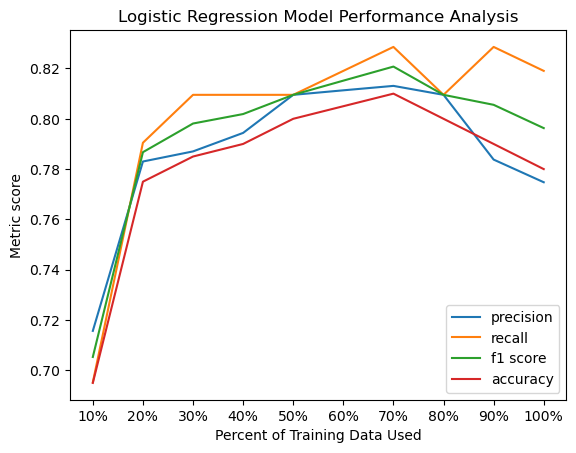

0.1 of training data used
0.6736842105263158 0.6095238095238096 0.64 0.64
0.2 of training data used
0.7669902912621359 0.7523809523809524 0.7596153846153846 0.75
0.30000000000000004 of training data used
0.7692307692307693 0.7619047619047619 0.7655502392344499 0.755
0.4 of training data used
0.7788461538461539 0.7714285714285715 0.7751196172248804 0.765
0.5 of training data used
0.7766990291262136 0.7619047619047619 0.7692307692307692 0.76
0.6 of training data used
0.7864077669902912 0.7714285714285715 0.7788461538461539 0.77
0.7000000000000001 of training data used
0.7962962962962963 0.819047619047619 0.8075117370892019 0.795
0.8 of training data used
0.7641509433962265 0.7714285714285715 0.7677725118483413 0.755
0.9 of training data used
0.7798165137614679 0.8095238095238095 0.794392523364486 0.78
1.0 of training data used
0.780952380952381 0.780952380952381 0.780952380952381 0.77


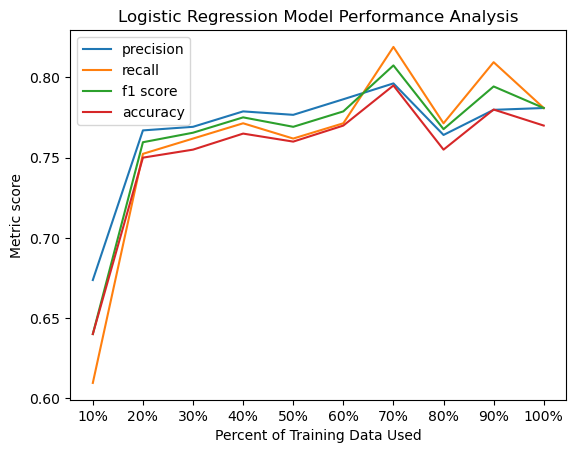

<Figure size 640x480 with 0 Axes>

In [7]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

model = sutils.create_log_reg(X_train_CV, y_train)
dev_preds = model.predict(X_dev_CV)
metrics = sutils.get_prfa(y_dev, dev_preds)
precision, recall, f1, accuracy = metrics
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('accuracy:', accuracy)
print()

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels
# takes approx 30 sec on Felix's computer

# graph for Multinomial, Count Vectorizer
model = LogisticRegression()
train_feats = [(x, y) for x,y in zip(X_train_CV, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_CV, y_dev) ]
sutils.create_training_graph(sutils.log_reg_metrics, train_feats, dev_feats, 'Logistic Regression', 'Logistic_Regression_CV_Multinomial_graph.png', True)

# graph for Multinomial, My Vectorizer
model = LogisticRegression()
train_feats = [(x, y) for x,y in zip(X_train_vects, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_vects, y_dev) ]
sutils.create_training_graph(sutils.log_reg_metrics, train_feats, dev_feats, 'Logistic Regression', 'Logistic_Regression_My_Vectorizer_Multinomial_graph.png', True)

Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: 0.781
- CountVectorizer features, multinomial: 0.796
- your vectorized features, binarized: 0.817
- CountVectorizer features, binarized: 0.820

Produce your graph(s) for the combination with the best final f1 score.




In [8]:
vocab = sutils.create_index(X_train)
# get binary feautures using own function
X_train_vects_binary, X_dev_vects_binary= sutils.featurize('own', X_train, X_dev,vocab = vocab, binary = True)

# get binary features using Sk-learns Count Vectorizer
X_train_CV_binary, X_dev_CV_binary = sutils.featurize('CV', X_train_flat, X_dev_flat, binary = True)

In [9]:
# get f1 score for my vectorizer, multinomial
sutils.log_reg_metrics(X_train_vects, y_train, X_dev_vects, y_dev)[2]

0.780952380952381

In [10]:
# get f1 score for Count Vectorizer, multinomial
sutils.log_reg_metrics(X_train_CV, y_train, X_dev_CV, y_dev)[2]

0.7962962962962963

In [11]:
# get f1 score for my vectorizer, binary
sutils.log_reg_metrics(X_train_vects_binary, y_train, X_dev_vects_binary, y_dev)[2]

0.81651376146789

In [12]:
# get f1 score for Count Vectorizer, binary
sutils.log_reg_metrics(X_train_CV_binary, y_train, X_dev_CV_binary, y_dev)[2]

0.8202764976958524

0.1 of training data used
0.7222222222222222 0.7428571428571429 0.732394366197183 0.715
0.2 of training data used
0.7636363636363637 0.8 0.7813953488372093 0.765
0.30000000000000004 of training data used
0.7478991596638656 0.8476190476190476 0.7946428571428571 0.77
0.4 of training data used
0.7317073170731707 0.8571428571428571 0.7894736842105263 0.76
0.5 of training data used
0.7567567567567568 0.8 0.7777777777777778 0.76
0.6 of training data used
0.7631578947368421 0.8285714285714286 0.7945205479452055 0.775
0.7000000000000001 of training data used
0.75 0.8 0.7741935483870969 0.755
0.8 of training data used
0.7807017543859649 0.8476190476190476 0.8127853881278538 0.795
0.9 of training data used
0.7894736842105263 0.8571428571428571 0.8219178082191781 0.805
1.0 of training data used
0.7946428571428571 0.8476190476190476 0.8202764976958524 0.805


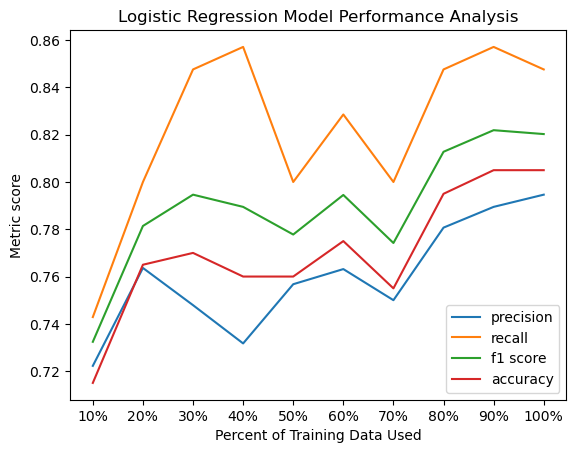

<Figure size 640x480 with 0 Axes>

In [13]:
# get graph for Count Vectorizer, binary (which had the best f1 score)

model = LogisticRegression(max_iter=500)
train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev) ]
sutils.create_training_graph(sutils.log_reg_metrics, train_feats, dev_feats, 'Logistic Regression', 'Logistic_Regression_CV_Binary_graph.png', True)

6120 REQUIRED
----

Find the top 100 most important features to your Logistic Regression classifier when using 100% of the training data. To access the weights of your model, you can access the `model.coef_` attribute. You'll want to use a `StandardScalar` preprocessor. This will help us deal with the fact that we expect counts of certain words to be higher (e.g. stop words).

To find the importance of a feature, calculate the absolute value of each weight in the model, then order your features according to the absolute values of these weights. The feature with the heighest absolute value weight has the most importance.

Use __your__ (not CountVectorizer) multinomial vectors for this analysis.

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [15]:
# YOUR CODE HERE
# train a model on the scaled inputs
# This takes Felix's computer about 6.5 sec to run




In [16]:
# print out the top 20 most informative features according to this model


In [17]:
# re-evalaute your LR model with inputs that have been filtered to only use the top 500 most informative features


In [18]:
# create the same graph as before, but with the filtered inputs
